### Random Forest Regression for predicting impact energy
#### Ref:  https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [3]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read in data and display first 5 rows

def linear(m,x):
    return m*x


# features0 = pd.read_excel('../Paper/WearPaper/time_energy_wear_rate_forK2_test2.xlsx')
features0 = pd.read_csv('../Paper/WearPaper/new_data/filtered_all.csv')
features0 = features0.append(features0)
features0 = features0.append(features0)
# features0 = features0.append(features0)

features = features0



# features0 = pd.read_csv('../Paper/WearPaper/new_data/filtered_all.csv')
# features = pd.read_csv('../Paper/WearPaper/new_data/filtered_all.csv')

# features.set_index('id')
# print(features.head(5))

# features = features.iloc[20:-18,:] # remove D=127 and last 18 rows
# features = features.iloc[:100,:] # remove last 18 rows
# f = features['N'] < 0.65
# features = features[f]
# features = features[(features["N"] == 0.7)]
print('The shape of our features is:', features.shape)


# Descriptive statistics for each column
#print(features.describe())


# One-hot encode the data using pandas get_dummies
# features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
# print(features.iloc[5:8,:].head(5))
print(features.columns)

# extdata = features['k1'] < 1
# features = features[extdata]
print('The shape of our features is:', features.shape)
# features = features[features['k1'] < 1000]


The shape of our features is: (1232, 8)
Index(['id', 'z', 'd/mesh', 'normT', 'normz', 'normh', 'k1', 'normTotal'], dtype='object')
The shape of our features is: (1232, 8)


### Explore data

In [ ]:

# import seaborn as sns
# plt.subplots(figsize=(20,15))
# sns.heatmap(features.corr(), annot=True)
# features.describe()
# sns.pairplot(features)
# sns.distplot(features['IE_per_mass'], bins=40)
# print("columns:", features.columns)

In [4]:
# Use numpy to convert to arrays
import numpy as np


# Labels are the values we want to predict
# features = features.iloc[14:,:] # remove top 14 rows

# features[features['N'] == 0.7]

labels = np.array(features['k1'])

features = features.drop('id', axis = 1)
features = features.drop('k1', axis = 1)
features = features.drop('z', axis = 1)
# features = features.drop('normT', axis = 1)

print(features.columns)

# from sklearn.preprocessing import StandardScaler

# Scaling
# scaler = StandardScaler()
# scaler.fit(features)
# scaled_data = scaler.transform(features)
# features = scaled_data

# Convert to numpy array
# features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)




print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)



# The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('average')]
# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))

# Write test data
# test_data = X_test
# test_data['k1'] = y_test
# test_data.to_excel("../Paper/WearPaper/new_data/test_data.xlsx")




Index(['d/mesh', 'normT', 'normz', 'normh', 'normTotal'], dtype='object')
Training Features Shape: (862, 5)
Training Labels Shape: (862,)
Testing Features Shape: (370, 5)
Testing Labels Shape: (370,)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Hyperparameter tuning

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

### Train the model

In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators = 400, min_samples_split = 2,
                           min_samples_leaf = 1,max_features='sqrt',max_depth=None,bootstrap=False,
                            random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# RMS
mean_squared_error(y_test,predictions)**0.5
print("R2 :",r2_score(y_test,predictions,multioutput='variance_weighted'))

print("DONE")

Mean Absolute Error: 0.03220492987522057
Accuracy: 98.77 %.
R2 : 0.9992989996908278
DONE


### Prediction

In [ ]:

# valid = errors < 5
# invalid = errors > 5
# count = 0
# for i in range(len(valid)):
#     if(valid[i]):
# #         print(errors[i])
#         count += 1
    
        
# print(count/len(X_test))
# print(type(X_test))
# print(X_test[invalid])

# newf = features0.drop(features0.index[[30, 79, 190, 137, 202, 173, 267, 220, 82, 265, 104, 60, 42, 22, 193, 109, 24, 143, 217, 6, 118, 165, 19, 90, 170, 15, 242, 33, 141, 250, 16, 228, 152]])
# newf.to_excel('../Paper/WearPaper/time_energy_wear_rate_forK2_test2_refined22.xlsx')



# print(X_test)

### Determine Performance Metrics

### Variable Importances
#### In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. 

In [ ]:
# Get numerical feature importances
# importances = list(rf.feature_importances_)
# # List of tuples with variable and importance
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### Visualization


In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
# import matplotlib.pyplot as plt
# %matplotlib inline
# # Set the style
# plt.style.use('fivethirtyeight')
# # list of x locations for plotting
# x_values = list(range(len(importances)))
# # Make a bar chart
# plt.bar(x_values, importances, orientation = 'vertical')
# # Tick labels for x axis
# plt.xticks(x_values, feature_list, rotation='vertical')
# # Axis labels and title
# plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Prediciton for HICOM mill

In [ ]:
# df0 = pd.read_excel('../test_code_new/4267mm/36mm/prediction_1-2.xlsx', sheet_name='1-2')
# features= df0.drop('z', axis = 1)
# features= features.drop('z_raw', axis = 1)
# features= features.drop('h', axis = 1)
# features= features.drop('finnei', axis = 1)
# features= features.drop('d', axis = 1)
# features= features.drop('E/A', axis = 1)
# features= features.drop('shear', axis = 1)
# features= features.drop('h/z', axis = 1)
# # features= features.drop('normh', axis = 1)
# features= features.drop('normE', axis = 1)
# features= features.drop('newh', axis = 1)
# features= features.drop('k1', axis = 1)
# features= features.drop('modnewh', axis = 1)

# features= features.drop('atan', axis = 1)

# print(features.columns)

# scaler = MinMaxScaler()
# scaler.fit(features)
# scaled_features = scaler.transform(features)


# predictions = rf.predict(scaled_features)
# df = pd.DataFrame(predictions, columns=['k1'])

# dt = 1924
# df0['k1'] = predictions
# # df0['newh'] = np.array(df0['h']) - dt*(0.001*np.array(df0['k1'])*1e-6*np.array(df0['shear']))/(2000*64*1e-6) # with k 
# # df0['newh'] = np.array(df0['h']) - dt*df0['k1']*(50.0/100.0)/50000.0 # with worn percentage
# df0['newh'] = np.array(df0['h']) - 41*dt*np.array(df0['k1'])*1e-6*np.array(df0['shear'])*(50.0/100.0)/700 # with worn percentage

# print(df0.tail())

# df0.to_excel('../test_code_new/4267mm/36mm/k_1_2.xlsx')


### Test for large scale

In [8]:
# features = pd.read_excel('../Paper/WearPaper/test_time_energy_wear.xlsx')
features0 = pd.read_excel('../Paper/WearPaper/new_data/test_data.xlsx')
features = pd.read_excel('../Paper/WearPaper/new_data/test_data.xlsx')

# features = features[(features["N"] == 0.7)]
# features = pd.read_excel('../test_code_new/test_data.xlsx')

# features = features.iloc[:-3,:] # 
# print(features.tail())
# print("NO OF FEATURES",len(features0))

actual = np.array(features['k1'])



# Remove the labels from the features
# axis 1 refers to the columns

features= features.drop('k1', axis = 1)
features= features.drop('id', axis = 1)
# features= features.drop('IESM', axis = 1)
# features= features.drop('F_plus_IESM', axis = 1)
# features= features.drop('shear', axis = 1)


# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
scaled_data = scaler.transform(features)
# print(np.shape(scaled_data))
# scaled_data = pd.DataFrame(scaled_data, columns=features.columns)

predictions = rf.predict(scaled_data)
print("NO OF PREDICTIONS", len(predictions))
# print(actual)
# print(predictions)


NO OF PREDICTIONS 370


### Compare actual vs prediction

In [9]:
# Calculate the absolute errors
errors = abs(predictions - actual)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'IE_per_mass.')

maxlim = 0
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors[maxlim:] / actual[maxlim:])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# RMS
print("Mean Sq Error :",mean_squared_error(actual,predictions)**0.5)
print("r2 score :",r2_score(actual,predictions))
print(actual[maxlim])

Mean Absolute Error: 0.24875 IE_per_mass.
Accuracy: 91.87 %.
Mean Sq Error : 1.122584221842792
r2 score : 0.9793131236558983
0.499193834


[218, 284, 76, 170, 218, 275, 275, 277, 247, 172, 282, 218, 170, 278, 282, 252, 218, 146, 223, 284, 76, 252]
Total 370
Valied 348
Valid percentage 94.05405405405405
Mean Absolute Error: 0.12199 IE_per_mass.
Accuracy: 98.34 %.
Mean Sq Error : 0.32260481054588896
r2 score : 0.998336126042717


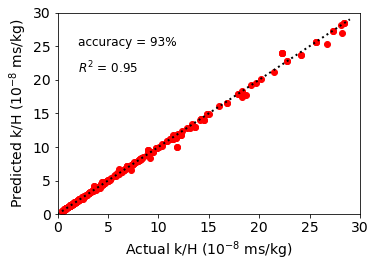

In [11]:
import matplotlib.pyplot as plt
# Plot actual and prediction

plt.rc('axes', labelsize=14) #font size of axes label
plt.rc('xtick', labelsize=14) #font size of tick label
plt.rc('ytick', labelsize=14) #font size of tick label

fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.set_xlim(0,30)
ax.set_ylim(0,30)

x = np.arange(0,30,1)
m = 1
y = linear(m, x)


maxlim = len(actual)
valid = []
invalid = []
newAct = []
newPred = []

for i in range(len(actual)):
    if (actual[i]/predictions[i] > 0.85 and actual[i]/predictions[i] < 1.2):
        newAct.append(actual[i])
        newPred.append(predictions[i])
    else:
        valid.append(False)
        invalid.append(features0['id'].iloc[i])


print(invalid)


print("Total",len(actual))
print("Valied",len(newAct))
print("Valid percentage",100*len(newAct)/len(actual))


# Calculate the absolute errors
newPred = np.array(newPred)
newAct = np.array(newAct)
errors = abs(newPred - newAct)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'IE_per_mass.')

maxlim = 0
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors[maxlim:] / newAct[maxlim:])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# RMS
print("Mean Sq Error :",mean_squared_error(newAct,newPred)**0.5)
print("r2 score :",r2_score(newAct,newPred))



ax.scatter(newAct, newPred,label="Prediction D >= 2000 mm",c='red')
# ax.scatter(actual[:maxlim], predictions[:maxlim],label="Test data",c='red', alpha=1.0)
# ax.scatter(actual[maxlim:], predictions[maxlim:],label="Prediction D >= 2000 mm",c='blue')


# print(actual)
# ax.scatter(actual[:], predictions[:],c='blue')
ax.plot(x,y,color='black', linestyle='dotted',linewidth=2.0, alpha=1)

ax.set_ylabel("Predicted k/H (10$^{-8}$ ms/kg)")
ax.set_xlabel("Actual k/H (10$^{-8}$ ms/kg)")
# ax.text(2150, 0.55, '$D_{50}$', fontsize=15)

ax.text(2, 25, 'accuracy = 93%', fontsize=12)
ax.text(2, 21, '$R^{2}$ = 0.95', fontsize=12)
# ax.text(0.55, 1.7, 'Prediction D = 2000 mm', fontsize=12)
# ax.text(0.55, 1.6, 'Prediction D = 4000 mm', fontsize=12)
# ax.legend(loc="upper right")
# lg = ax.legend(loc="upper left")
# lg.get_frame().set_alpha(0)

plt.show()

import os
# save figure
# path = "../Paper/WearPaper/fig"
# fout = os.path.join(path, "shear_RandomForest_k.jpg")
# fig.savefig(fout, dpi=300)
